In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

In [2]:
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2

def bspline(x, t, c, k):
    n = len(t) - k - 1
    assert (n >= k+1) and (len(c) >= n)
    return sum(c[i] * B(x, k, i, t) for i in range(n))

In [3]:
from scipy.interpolate import BSpline
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
c = [-1, 2, 0, -1]
spl = BSpline(t, c, k)
spl(2.5)

array(1.375)

In [4]:
bspline(2.5, t, c, k)

1.375

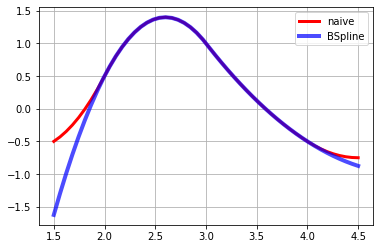

In [5]:
fig, ax = plt.subplots()
xx = np.linspace(1.5, 4.5, 50)
ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
ax.plot(xx, spl(xx), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [6]:
knots = [0, 1, 2, 3, 4]
b = BSpline.basis_element(knots)
k = b.k
b.t[k:-k]

array([0., 1., 2., 3., 4.])

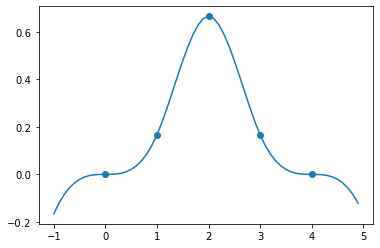

In [7]:
x = np. arange(-1, 5, 0.1)
plt.plot(x, b(x))
plt.scatter(knots, b(knots))

In [21]:
BSpline.basis_element([0, 1, 2, 3, 4, 5, 6, 7]).k

6

In [26]:
 BSpline.basis_element(np.arange(0, 200, 1)).k

198

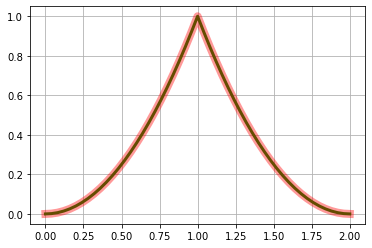

In [50]:
t = [-1, 0, 1, 1, 2]
b = BSpline.basis_element(t[1:])
def f(x):
    return np.where(x < 1, x*x, (2. - x)**2)

fig, ax = plt.subplots()
x = np.linspace(0, 2, 51)
ax.plot(x, b(x), 'g', lw=3)
ax.plot(x, f(x), 'r', lw=8, alpha=0.4)
ax.grid(True)
plt.show()


In [51]:
t[1:]

[0, 1, 1, 2]

Text(0.5, 1.0, 'In SciPy')

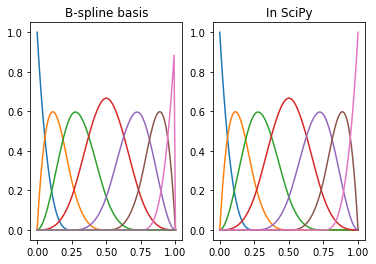

In [15]:
import patsy # for comparison

these_knots = np.linspace(0,1,5)

# in Patsy/R: nice and sensible
x = np.linspace(0., 1., 100)
y = patsy.bs(x, knots=these_knots, degree=3)
plt.subplot(1,2,1)
plt.plot(x,y)
plt.title('B-spline basis')

# in scipy: ?????
numpyknots = np.concatenate(([0,0,0],these_knots,[1,1,1])) # because??
y_py = np.zeros((x.shape[0], len(these_knots)+2))
for i in range(len(these_knots)+2):
    y_py[:,i] = BSpline(numpyknots, (np.arange(len(these_knots)+2)==i).astype(float), 3, extrapolate=False)(x)

plt.subplot(1,2,2)
plt.plot(x,y_py)
plt.title('In SciPy')

In [55]:
numpyknots.shape

(11,)

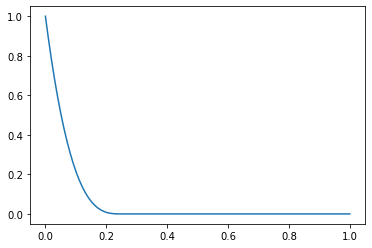

In [58]:
fig, ax = plt.subplots()
plt.plot(x, y_py[:,0])
# ax.scatter(these_knots)

In [59]:
(np.arange(len(these_knots)+2)==i).astype(float)

array([0., 0., 0., 0., 0., 0., 1.])

In [61]:
len(these_knots)+2==i

False

In [62]:
np.arange(len(these_knots)+2)

array([0, 1, 2, 3, 4, 5, 6])

In [63]:
i

6

Text(0.5, 1.0, 'In SciPy')

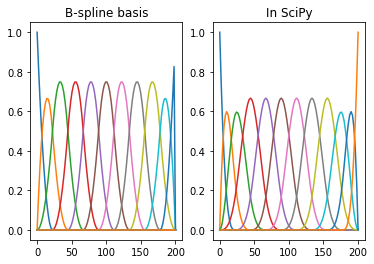

In [88]:
these_knots = np.linspace(0,200,10)

# in Patsy/R: nice and sensible
x = np.linspace(0., 200, 100)
y = patsy.bs(x, knots=these_knots, degree=2)
plt.subplot(1,2,1)
plt.plot(x,y)
plt.title('B-spline basis')

# in scipy: ?????
numpyknots = np.concatenate(([0,0,0],these_knots,[200,200,200])) # because??
y_py = np.zeros((x.shape[0], len(these_knots)+2))
for i in range(len(these_knots)+2):
    y_py[:,i] = intrp.BSpline(numpyknots, (np.arange(len(these_knots)+2)==i).astype(float), 3, extrapolate=False)(x)

plt.subplot(1,2,2)
plt.plot(x,y_py)
plt.title('In SciPy')

In [89]:
y.shape

(100, 12)

In [90]:
y_py.shape

(100, 12)